In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression,Ridge , Lasso
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# so droping the column unnamed because it of no use

df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


from this we can identify that there is a huge difference between Mean and Median so that means that the dataset is skewed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [7]:
df.shape

(18249, 13)

In [8]:
# know what type of data is Date

type(df['Date'][0])

str

In [9]:
# converting the date column into a day month and year column to check the unique values

from datetime import datetime
import calendar
df['Date']=pd.to_datetime(df['Date'])

In [10]:
df['Day']=df.Date.apply(lambda x : x.day)
df['Week_day']=df.Date.apply(lambda x : calendar.day_name[x.weekday()])
df['Month']=df.Date.apply(lambda x : x.month)
df['Year']=df.Date.apply(lambda x : x.year)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Week_day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,Sunday,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,Sunday,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,Sunday,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,Sunday,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,Sunday,11,2015


In [12]:
# checking the unique value in Day column

df.Day.unique()

array([27, 20, 13,  6, 29, 22, 15,  8,  1, 25, 18, 11,  4, 30, 23, 16,  9,
        2, 26, 19, 12,  5, 28, 21, 14,  7, 31, 24, 17, 10,  3],
      dtype=int64)

In [13]:
# droping the Day column as it dose not have any unique value

df.drop(columns=['Date','Week_day'],inplace=True)

In [14]:
df.shape

(18249, 15)

In [15]:
df.nunique()

AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
Day                31
Month              12
Year                4
dtype: int64

In [16]:
df['region'].value_counts()

SouthCentral           338
SanDiego               338
Louisville             338
West                   338
Boston                 338
HartfordSpringfield    338
Chicago                338
LosAngeles             338
Roanoke                338
California             338
Columbus               338
PhoenixTucson          338
HarrisburgScranton     338
GrandRapids            338
Sacramento             338
Philadelphia           338
Nashville              338
BaltimoreWashington    338
MiamiFtLauderdale      338
TotalUS                338
BuffaloRochester       338
SanFrancisco           338
Charlotte              338
NewOrleansMobile       338
NorthernNewEngland     338
Atlanta                338
RichmondNorfolk        338
Spokane                338
RaleighGreensboro      338
Seattle                338
LasVegas               338
Syracuse               338
Pittsburgh             338
SouthCarolina          338
StLouis                338
CincinnatiDayton       338
Tampa                  338
B

In [17]:
# finding all the unique values from all the columns

cont_columns=[]
for i in df.columns:
    if df[i].nunique()>55:
        cont_columns.append(i)

# EDA on Continuous Columns


1. Checking All The Distribution Value So That We Can Reduce The Skewness

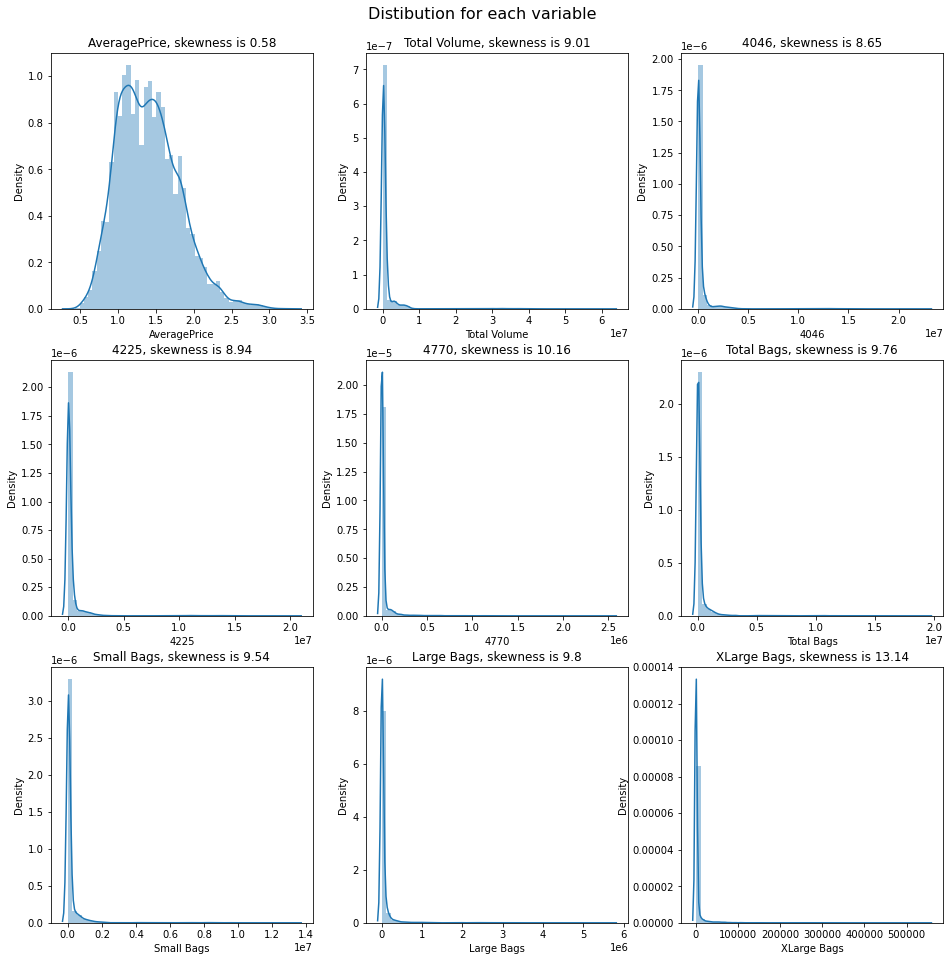

In [18]:
# Rectifying the data from skewness

def data1(dt1, col_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(col_list):
        sns.distplot(dt1[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dt1[data].skew(axis = 0, skipna = True),2)))
        
data1(dt1=df, col_list=cont_columns, rows=3, cols=3, suptitle='Distibution for each variable')

# Detecting Outlier

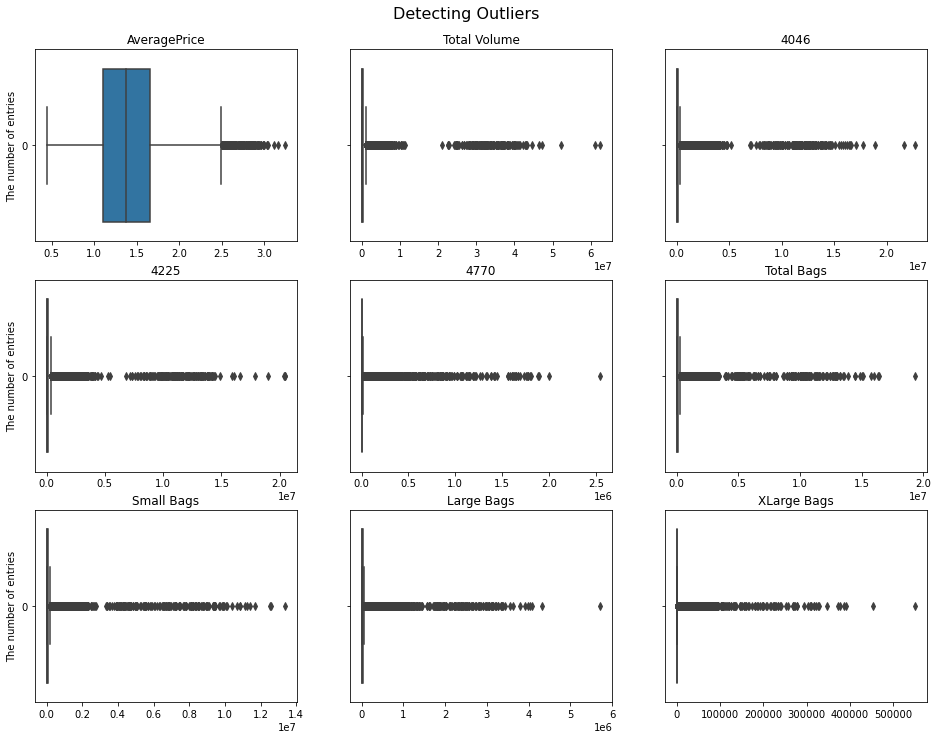

In [19]:
def ot(dt2, col_list1, rows1, cols1, suptitle):
    fig, axs = plt.subplots(rows1, cols1, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(col_list1):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dt2[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
ot(dt2=df, col_list1=cont_columns, rows1=3, cols1=3, suptitle='Detecting Outliers')

As We can see that all the columns have outliers.

In [20]:
df2=df.copy()

In [21]:
for i in [x for x in cont_columns if x not in ['AveragePrice']]:
    q1 = df2[i].quantile(0.25)
    q3 = df2[i].quantile(0.75)
    IQR = q3 - q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    df2.loc[df2[i]>upper,i]=upper
    df2.loc[df2[i]<lower,i]=lower

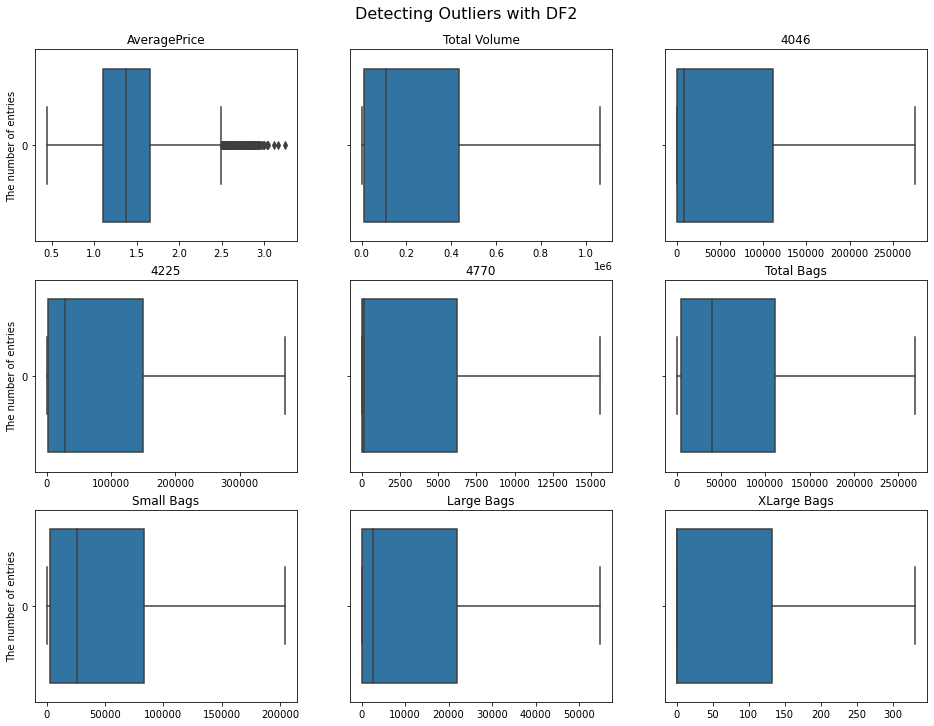

In [22]:
def ot(dt2, col_list1, rows1, cols1, suptitle):
    fig, axs = plt.subplots(rows1, cols1, sharey=True, figsize=(16,12))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(col_list1):
        if i % 3 == 0:
            axs[i].set_ylabel('The number of entries')
        sns.boxplot( data=dt2[data], orient='h', ax=axs[i])
        axs[i].set_title(data)
        
ot(dt2=df2, col_list1=cont_columns, rows1=3, cols1=3, suptitle='Detecting Outliers with DF2')

All the columns outliers have been removed but only Large Bags column still have high outliers because the value has higher occurence.

In [23]:
# checking the value count of the column in Large Bags
df['Large Bags'].value_counts()

0.00         2370
3.33          187
6.67           78
10.00          47
4.44           38
             ... 
239195.91       1
3521.23         1
52.17           1
6935.32         1
16675.91        1
Name: Large Bags, Length: 15082, dtype: int64

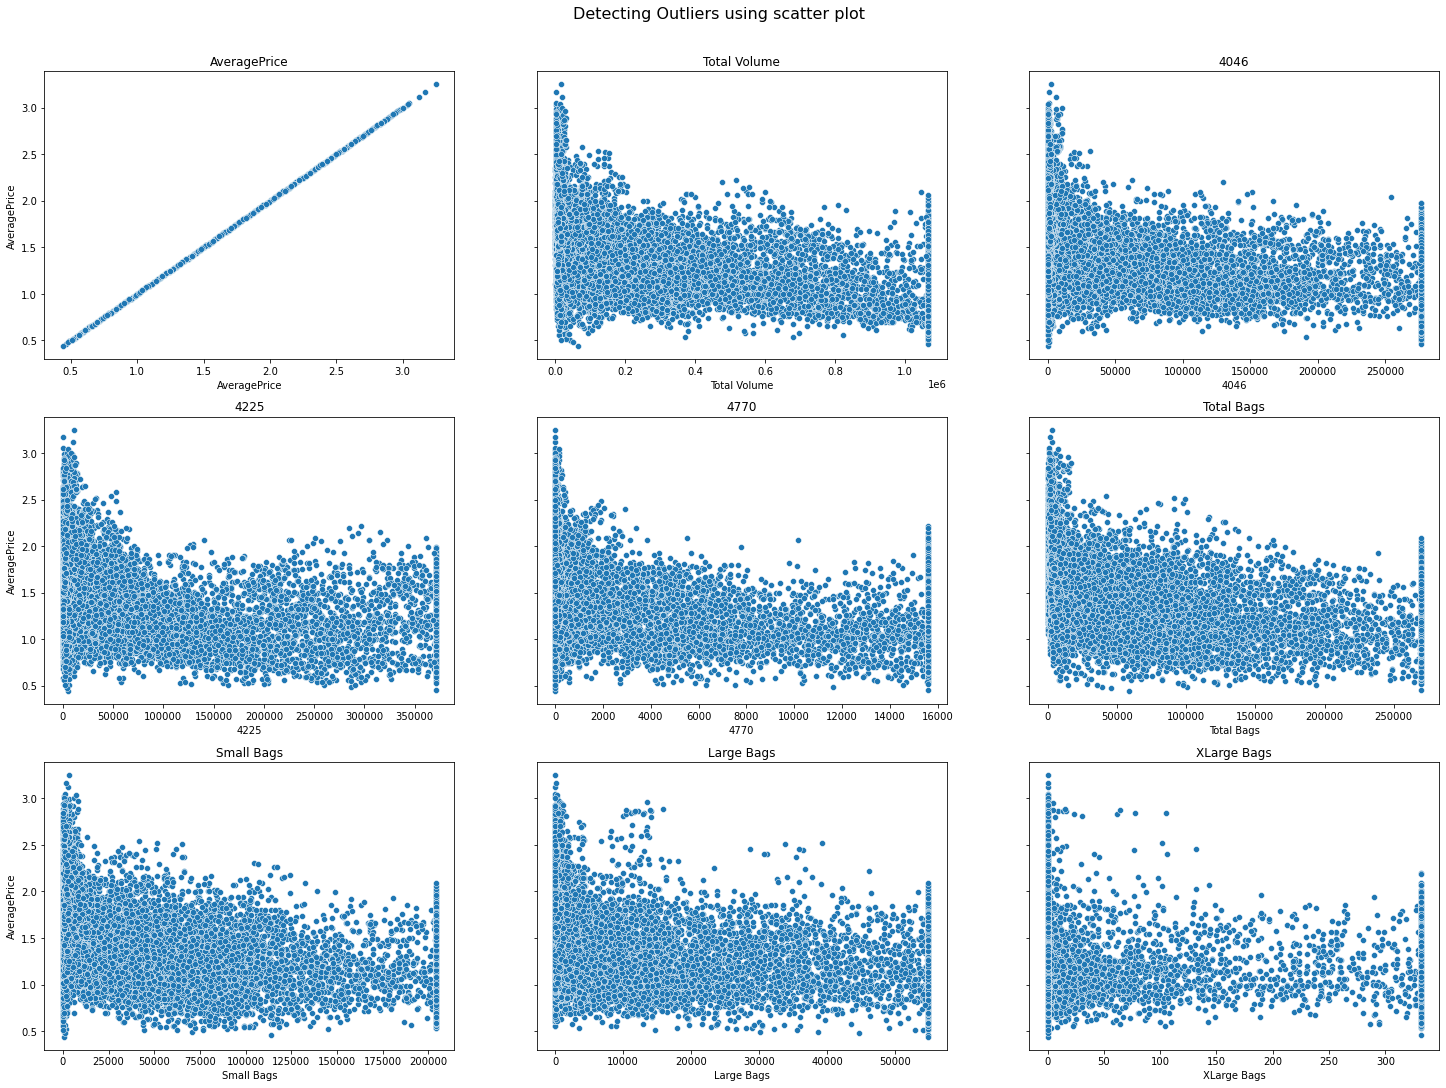

In [24]:
def scatter(dt, col_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(25,18))
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(col_list):
        if i % 3 == 0:
            axs[i].set_ylabel('AveragePrice')
        sns.scatterplot(x=dt[data],y=dt['AveragePrice'], ax=axs[i])
        axs[i].set_title(data)
        
scatter(dt=df2, col_list=cont_columns, rows=3, cols=3, suptitle='Detecting Outliers using scatter plot')

In [25]:
Pow=PowerTransformer(standardize=False)
Pow.fit(df2[[x for x in cont_columns if x not in ['AveragePrice']]])
df2[[x for x in cont_columns if x not in ['AveragePrice']]]=Pow.transform(df2[[x for x in cont_columns if x not in ['AveragePrice']]])

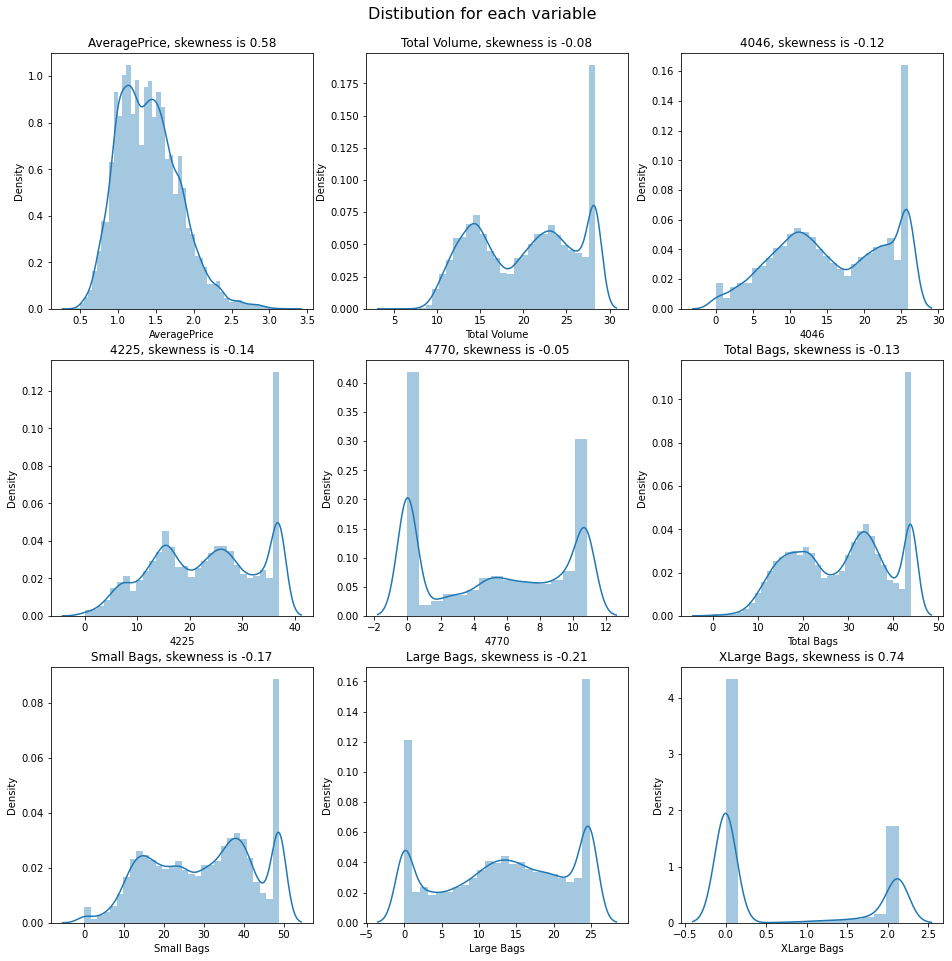

In [26]:
# Rectifying the data from skewness with dt1 after reducing the errors

def data1(dt1, col_list, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols,figsize=(16,16))
    fig.suptitle(suptitle,y=0.92, size=16)
    axs = axs.flatten()
    for i, data in enumerate(col_list):
        sns.distplot(dt1[data], ax=axs[i])
        axs[i].set_title(data + ', skewness is '+str(round(dt1[data].skew(axis = 0, skipna = True),2)))
        
data1(dt1=df2, col_list=cont_columns, rows=3, cols=3, suptitle='Distibution for each variable')

# Correlation

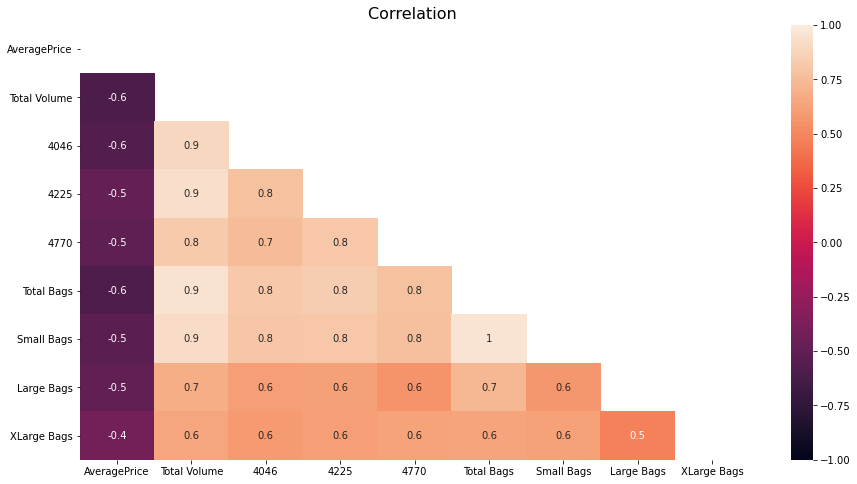

In [27]:
# calculating the correlation matrix
Corre = df2[cont_columns].corr()
matrix = np.triu(Corre)
plt.figure(figsize=(15, 8))
sns.heatmap(Corre, vmax=1.0, vmin=-1.0, 
            fmt='.1g', annot=True, mask = matrix)
plt.title('Correlation ', size=16)
plt.show()

there are high Multicollinearity in some of the columns

# Removing Redundant Columns using Variance Inflation Factor

In [28]:

# VIF dataframe
vif = pd.DataFrame()
vif["feature"] = [x for x in cont_columns if x not in ['AveragePrice']]
  


In [29]:
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(df2[[x for x in cont_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df2[[x for x in cont_columns if x not in ['AveragePrice']]].columns))]
  
print(vif)

        feature         VIF
0  Total Volume  161.565363
1          4046   24.878723
2          4225   45.717597
3          4770    8.782261
4    Total Bags  310.779575
5    Small Bags  124.942911
6    Large Bags   13.182071
7   XLarge Bags    2.729088


In [30]:
# VIF dataframe
vif= pd.DataFrame()
vif["feature"] = [x for x in cont_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(df2[[x for x in cont_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df2[[x for x in cont_columns if x not in ['AveragePrice']]].columns))]
  
print(vif)

        feature         VIF
0  Total Volume  161.565363
1          4046   24.878723
2          4225   45.717597
3          4770    8.782261
4    Total Bags  310.779575
5    Small Bags  124.942911
6    Large Bags   13.182071
7   XLarge Bags    2.729088


In [31]:
# VIF dataframe
vif= pd.DataFrame()
vif["feature"] = [x for x in cont_columns if x not in ['AveragePrice']]
  
# calculating VIF for each feature
vif["VIF"] = [variance_inflation_factor(df2[[x for x in cont_columns if x not in ['AveragePrice']]].values, i)
                          for i in range(len(df2[[x for x in cont_columns if x not in ['AveragePrice']]].columns))]
  
print(vif)

        feature         VIF
0  Total Volume  161.565363
1          4046   24.878723
2          4225   45.717597
3          4770    8.782261
4    Total Bags  310.779575
5    Small Bags  124.942911
6    Large Bags   13.182071
7   XLarge Bags    2.729088


In [32]:
df2.drop(columns=['Total Volume','Total Bags','Small Bags','4046'],inplace=True)

# Let us find out the Categorical Columns

In [33]:
cate_columns=[x for x in df.columns if x not in cont_columns]+['AveragePrice']

In [34]:
df2[cate_columns].nunique()

type              2
year              4
region           54
Day              31
Month            12
Year              4
AveragePrice    259
dtype: int64

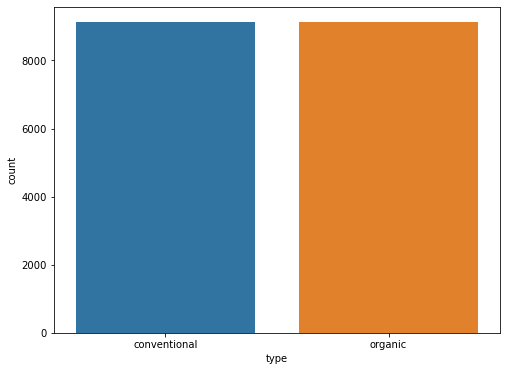

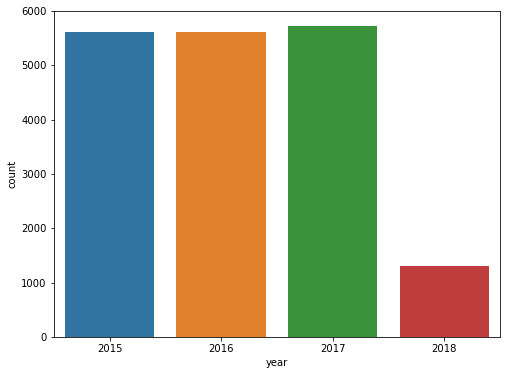

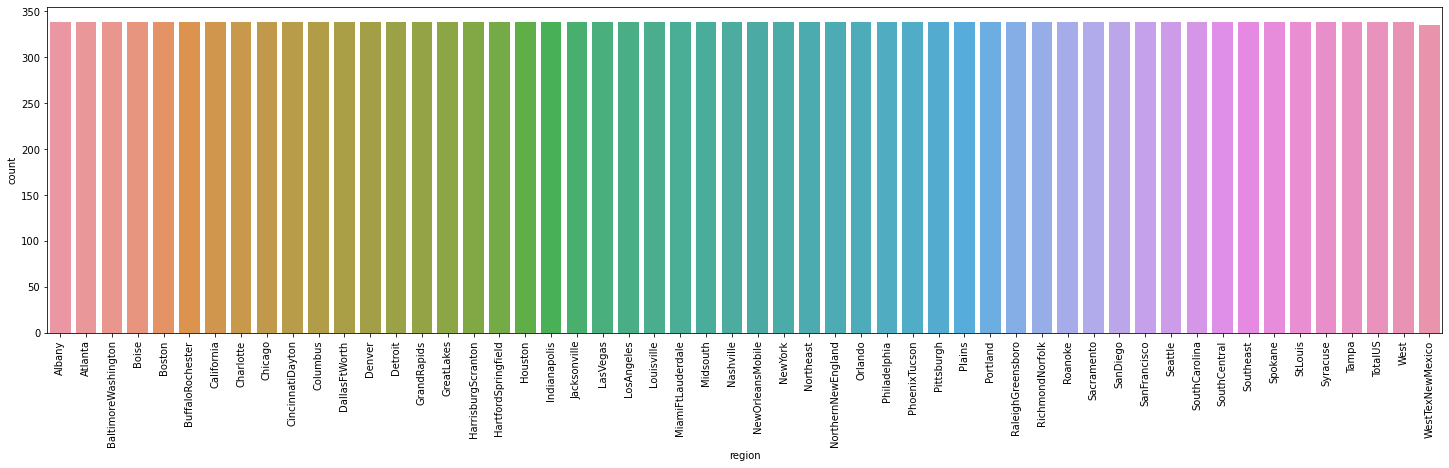

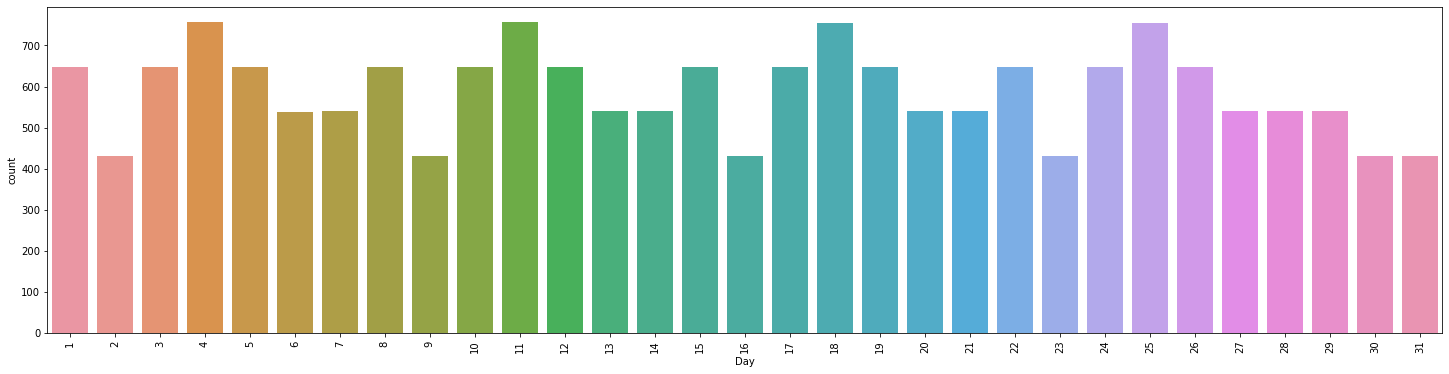

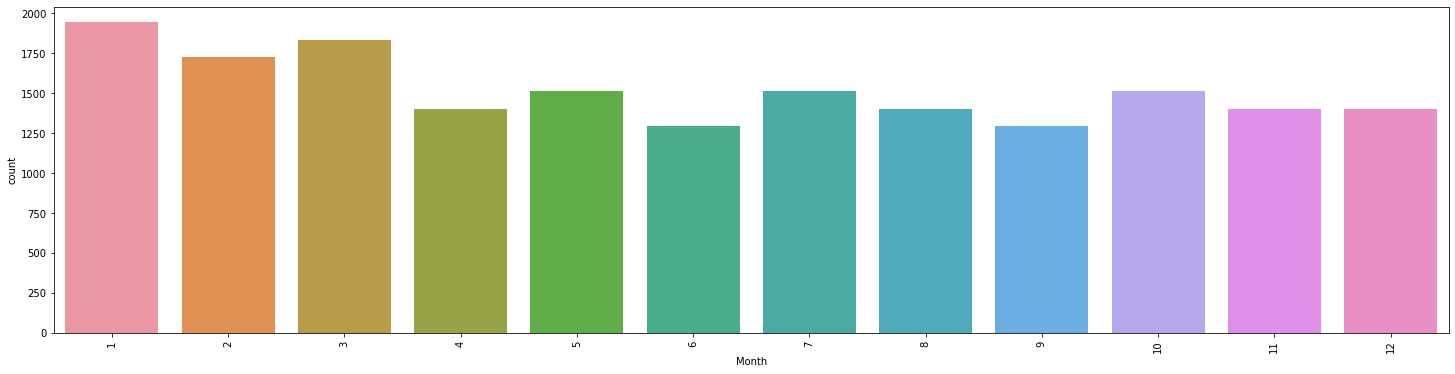

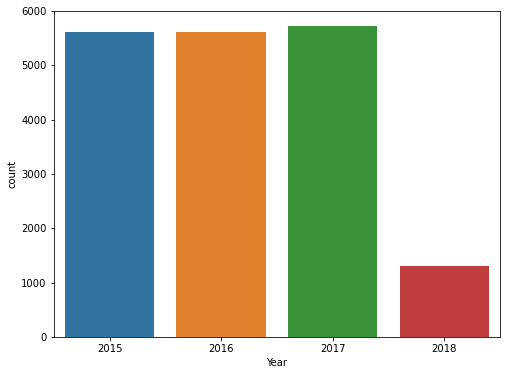

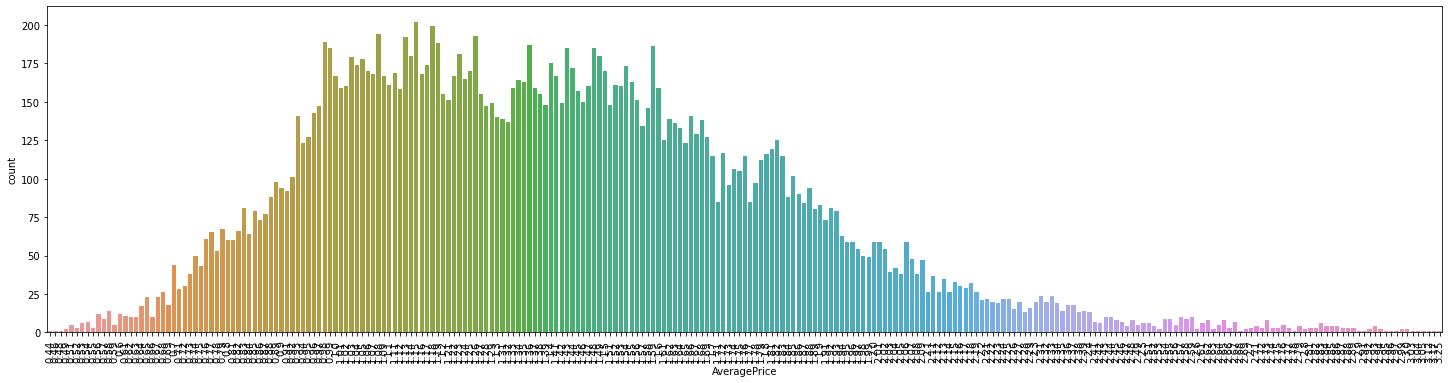

In [35]:
for i in cate_columns:
  if df2[i].nunique()<5:
    plt.figure(figsize=(8,6))
    sns.countplot(df2[i])
    plt.show()
  else:
    plt.figure(figsize=(25,6))
    sns.countplot(df2[i])
    plt.xticks(rotation=90)
    plt.show()

The counts of all the regions is equal which means we have sufficient data so we can take all the regions

# Columnsets Vs Average Price

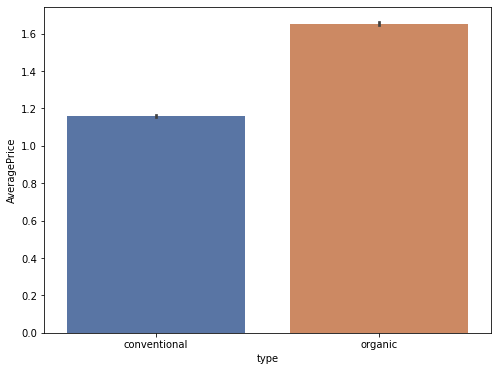

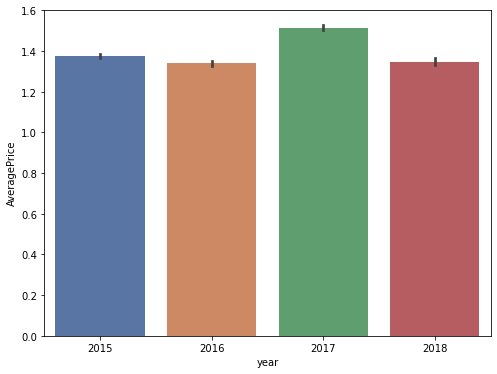

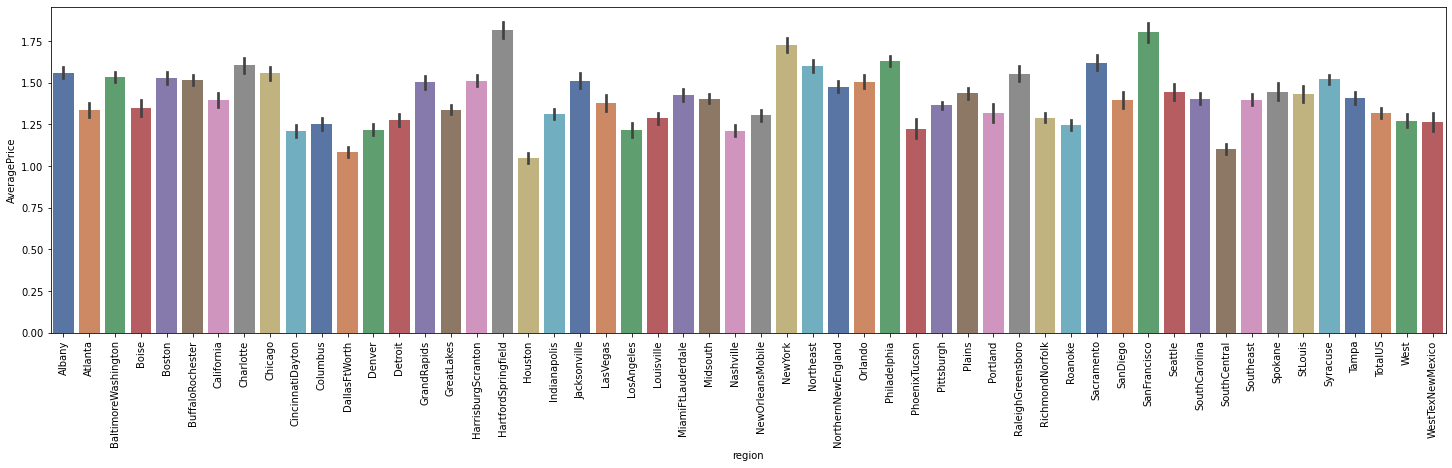

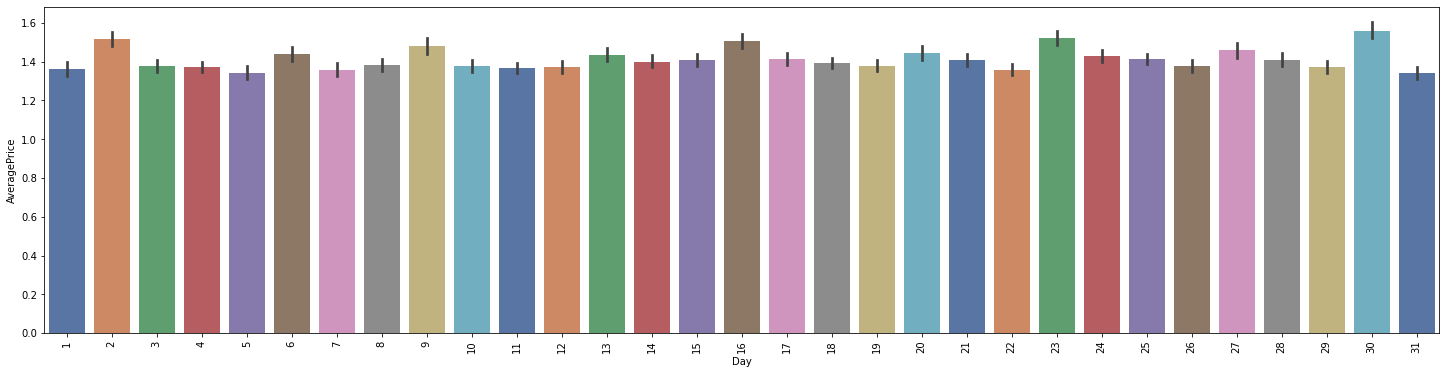

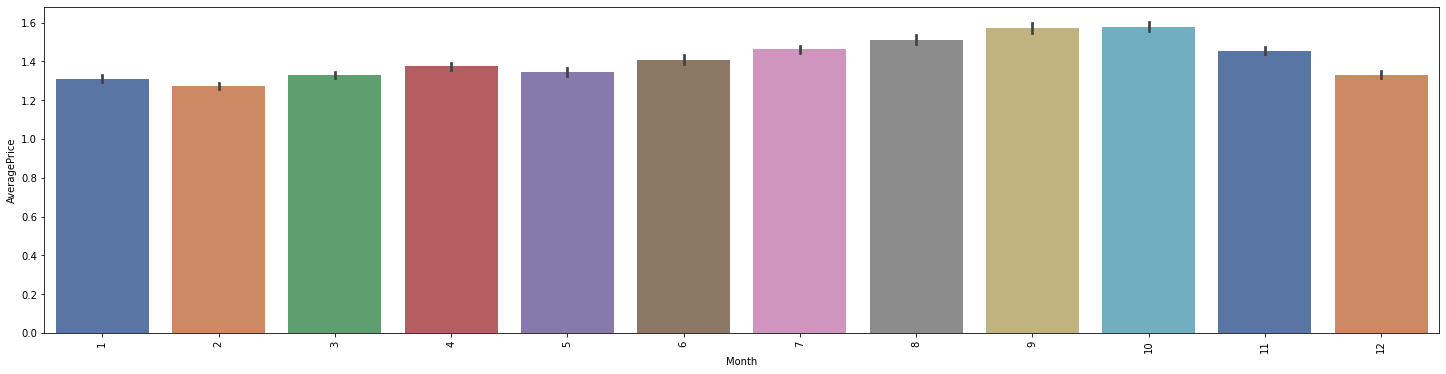

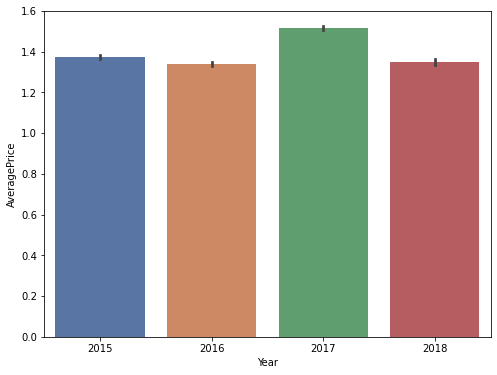

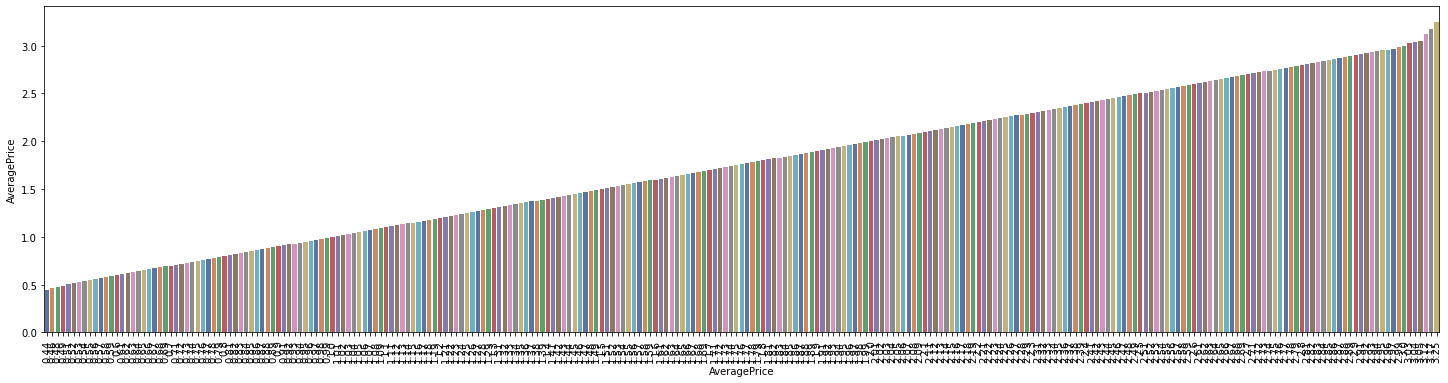

In [36]:
for i in cate_columns:
  if df2[i].nunique()<5:
    plt.figure(figsize=(8,6))
    sns.barplot(x=df2[i],y=df2['AveragePrice'],palette="deep")
    plt.show()
  else:
    plt.figure(figsize=(25,6))
    sns.barplot(x=df2[i],y=df2['AveragePrice'],palette="deep")
    plt.xticks(rotation=90)
    plt.show()

The average price for organic avacados are high when we compare it with  the conventional

from the above chart we can see that the price was high from October and November

In [37]:
df3= pd.get_dummies(df2, columns = ['type', 'region'])

In [38]:
df3.shape

(18249, 65)

In [39]:
df3.drop_duplicates().shape

(18249, 65)

In [40]:
df3.head()

,AveragePrice,4225,4770,Large Bags,XLarge Bags,year,Day,Month,Year,type_conventional,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,26.395599,4.073866,6.268019,-0.0,2015,27,12,2015,1,...,0,0,0,0,0,0,0,0,0,0
1,1.35,25.456298,4.279865,6.349359,-0.0,2015,20,12,2015,1,...,0,0,0,0,0,0,0,0,0,0
2,0.93,29.900954,5.161674,6.453163,-0.0,2015,13,12,2015,1,...,0,0,0,0,0,0,0,0,0,0
3,1.08,27.759977,4.516779,6.943073,-0.0,2015,6,12,2015,1,...,0,0,0,0,0,0,0,0,0,0
4,1.28,25.372119,4.563771,7.713814,-0.0,2015,29,11,2015,1,...,0,0,0,0,0,0,0,0,0,0


In [41]:
X=df3.drop(columns='AveragePrice')
y=df3['AveragePrice']

There are no Duplicaate values

# Feature Engineering

In [42]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [43]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [44]:
ls=Lasso(alpha=0.01)
ls.fit(X_train,y_train)

Lasso(alpha=0.01)

In [45]:
ls.coef_

array([-0.00000000e+00, -0.00000000e+00, -8.80251311e-02,  0.00000000e+00,
        4.25828279e-02,  0.00000000e+00,  6.05678245e-02,  1.05262702e-02,
       -1.93189886e-01,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        8.22168787e-04, -6.12639419e-04,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  1.05183520e-02,  3.14089558e-03, -9.37123978e-03,
       -1.09535640e-02, -3.54124800e-02, -5.89637878e-03, -6.25993744e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  3.48372496e-02,
       -3.79924705e-02, -0.00000000e+00,  3.80780592e-03, -0.00000000e+00,
       -1.48629939e-02, -5.85065685e-03,  0.00000000e+00,  6.84008992e-05,
       -1.31291285e-02, -7.31891546e-03,  3.58389274e-02,  2.44464875e-02,
       -0.00000000e+00,  3.93452850e-03,  1.83079180e-02, -1.52890962e-02,
       -0.00000000e+00,  1.02460154e-03, -5.10884040e-04,  6.05327759e-03,
       -1.11522970e-02, -1.44457754e-02,  4.59259006e-03, -0.00000000e+00,
        3.06134605e-02,  

In [46]:
coeff1=pd.DataFrame(zip(X.columns,ls.coef_),columns=['column','coefficients'])

In [47]:
features_lasso=list(coeff1[coeff1['coefficients']!=0]['column'])

In [48]:
dflasso=df3[features_lasso].copy()

In [55]:
dflasso.shape

(18249, 36)

After using Lasso Regression ,we will remove 30 feature from it 

# Decision Tree Regressor

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=0)
scaler=StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [57]:
dtr=DecisionTreeRegressor(max_features=18,max_depth=18)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=18, max_features=18)

In [58]:
#predicting
y_train_pred=dtr.predict(X_train)
y_test_pred=dtr.predict(X_test)

In [59]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8842045756158529

In [60]:
# r2 for test
r2_score(y_test,y_test_pred)

0.721808133496443

# Decision Tree Regreesor with Grid Search

In [70]:
param={'max_depth':[11,12,13,14,15,16,17,18,19,20],'max_features':[16,17,18,19,15,14],'min_samples_split':[1,2,3,4],'ccp_alpha':[0.0001,0.001,0.00001,0.000001]}
dtr1=DecisionTreeRegressor()
dtr_grid=GridSearchCV(dtr1, param_grid=param,cv=5, scoring='neg_mean_squared_error')
dtr_grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': [0.0001, 0.001, 1e-05, 1e-06],
                         'max_depth': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                         'max_features': [16, 17, 18, 19, 15, 14],
                         'min_samples_split': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [72]:
# checking the best parameters
dtr_grid.best_params_

{'ccp_alpha': 1e-05,
 'max_depth': 20,
 'max_features': 19,
 'min_samples_split': 3}

In [73]:
#predicting
y_train_pred=dtr_grid.predict(X_train)
y_test_pred=dtr_grid.predict(X_test)

In [74]:
#r2 for train
r2_score(y_train,y_train_pred)

0.8729669399352452

In [75]:
# r2 for test
r2_score(y_test,y_test_pred)

0.7347974951373595

In [76]:
cro1=cross_val_score(dtr1, X_train, y_train,scoring='r2')
cro1

array([0.746403  , 0.71261668, 0.73498236, 0.73839472, 0.71826875])

In [77]:
np.mean(cro1)

0.7301331018294567

In [78]:
np.std(cro1)

0.012681222761038577

# Linear Regression

In [70]:
X=df3[features_lasso].copy()
y=df3['AveragePrice']

In [72]:
trainscore=0
testscore=0
for i in range(0,200):
  X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=i)
  scaler1=MinMaxScaler()
  scaler1.fit(X_train)
  X_train=scaler1.transform(X_train)
  X_test=scaler1.transform(X_test)
  lr=LinearRegression()
  lr.fit(X_train,y_train)
  y_train_pred=lr.predict(X_train)
  y_test_pred=lr.predict(X_test)
  train1=r2_score(y_train,y_train_pred)
  test1=r2_score(y_test,y_test_pred)
  if (trainscore<train1) and (testscore<test1):
    trainscore=train1
    testscore=test1
    random=i
print('Train Score',trainscore)
print('Test Score',testscore)
print('Random State',random)

Train Score 0.6022202171379614
Test Score 0.5897788263689545
Random State 97


# Random Forest Regressor

In [56]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=144)
scaler1=StandardScaler()
scaler1.fit(X_train)
X_train=scaler1.transform(X_train)
X_test=scaler1.transform(X_test)

In [57]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [58]:
#predicting
y_train_pred=rfr.predict(X_train)
y_test_pred=rfr.predict(X_test)

In [59]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9829384092337892

In [60]:
# r2 for test
r2_score(y_test,y_test_pred)

0.882281437625017

# Random Forest Regressor with Grid Search with CV

In [61]:
param={'max_depth':[25,22,23,24],'max_features':[8,9,10],'ccp_alpha':[1e-08,1e-09,1e-10]}
rfr1=RandomForestRegressor(n_estimators=100)
rfr_grid=GridSearchCV(rfr1, param_grid=param,cv=3, scoring='neg_mean_squared_error')
rfr_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [1e-08, 1e-09, 1e-10],
                         'max_depth': [25, 22, 23, 24],
                         'max_features': [8, 9, 10]},
             scoring='neg_mean_squared_error')

In [62]:
#predicting
y_train_pred=rfr_grid.predict(X_train)
y_test_pred=rfr_grid.predict(X_test)

In [63]:
rfr_grid.best_params_

{'ccp_alpha': 1e-09, 'max_depth': 25, 'max_features': 10}

In [64]:
#r2 for train
r2_score(y_train,y_train_pred)

0.9639255575354813

In [65]:
# r2 for test
r2_score(y_test,y_test_pred)

0.870715490536408

In [66]:
cro=cross_val_score(rfr1, X_train, y_train,scoring='r2')
cro

array([0.86667178, 0.86752215, 0.86310912, 0.86698879, 0.86132206])

In [67]:
np.mean(cro)

0.8651227808924287

In [68]:
np.std(cro)

0.002455142534943132

According to cross validation score the best score is given by Random Forest Regressor the mean is 86 and standard Deviation is less than other model

# After trying all the above models and hyperparameter tuning,Random Forest Regressor gave some better results with the mean cross validation r2 score of 86% and the standard deviation of those scores being just 4%. R2 score on test set also is 86%.

# Saving The Model

In [79]:
import pickle

In [80]:
# Save the trained model as a pickle string.
savemodel = pickle.dumps(rfr)
 
# Load the pickled model
Rfr_from_pickle = pickle.loads(savemodel)
 
# Use the loaded pickled model to make predictions
Rfr_from_pickle.predict(X_test)

array([1.2215, 1.2795, 1.0136, ..., 1.3058, 1.0755, 1.3372])